# GEOS 518 Notebook 1: Reading in Time Series Data
   ## By: Zakk Hess
   ## January 27th, 2018
   

## 1) Load libraries and import data

In [7]:
import pandas as pd # data management
import numpy as np # computations
import matplotlib.pyplot as plt # plotting

df = pd.read_csv('BB_AirT_12_17.csv', names=['Y','M','D','T(C)'], skiprows=1) #load CSV into variable df

print(df) #see matrix

         Y   M   D   T(C)
0     2012  10   2  11.11
1     2012  10   3   5.56
2     2012  10   4   5.00
3     2012  10   5   3.33
4     2012  10   6   2.78
5     2012  10   7   5.00
6     2012  10   8   6.67
7     2012  10   9   9.44
8     2012  10  10   8.89
9     2012  10  11  10.00
10    2012  10  12  11.67
11    2012  10  13   6.11
12    2012  10  14   8.89
13    2012  10  15   9.44
14    2012  10  16   6.11
15    2012  10  17   2.22
16    2012  10  18   6.67
17    2012  10  19  10.00
18    2012  10  20   4.44
19    2012  10  21   1.67
20    2012  10  22   0.56
21    2012  10  23  -2.78
22    2012  10  24  -2.22
23    2012  10  25  -2.22
24    2012  10  26  -1.67
25    2012  10  27   1.67
26    2012  10  28   6.11
27    2012  10  29   6.67
28    2012  10  30   9.44
29    2012  10  31  11.11
...    ...  ..  ..    ...
1795  2017   9   1  18.33
1796  2017   9   2  18.89
1797  2017   9   3  20.56
1798  2017   9   4  23.89
1799  2017   9   5  20.56
1800  2017   9   6  20.56
1801  2017  

## 2) Compute Serial Dates

In [8]:
df['SerialDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d') #use YMD to make date (SerialDates) for each value in var.

print(df) #show matrix with serial dates datetime var. included 

         Y   M   D   T(C) SerialDates
0     2012  10   2  11.11  2012-10-02
1     2012  10   3   5.56  2012-10-03
2     2012  10   4   5.00  2012-10-04
3     2012  10   5   3.33  2012-10-05
4     2012  10   6   2.78  2012-10-06
5     2012  10   7   5.00  2012-10-07
6     2012  10   8   6.67  2012-10-08
7     2012  10   9   9.44  2012-10-09
8     2012  10  10   8.89  2012-10-10
9     2012  10  11  10.00  2012-10-11
10    2012  10  12  11.67  2012-10-12
11    2012  10  13   6.11  2012-10-13
12    2012  10  14   8.89  2012-10-14
13    2012  10  15   9.44  2012-10-15
14    2012  10  16   6.11  2012-10-16
15    2012  10  17   2.22  2012-10-17
16    2012  10  18   6.67  2012-10-18
17    2012  10  19  10.00  2012-10-19
18    2012  10  20   4.44  2012-10-20
19    2012  10  21   1.67  2012-10-21
20    2012  10  22   0.56  2012-10-22
21    2012  10  23  -2.78  2012-10-23
22    2012  10  24  -2.22  2012-10-24
23    2012  10  25  -2.22  2012-10-25
24    2012  10  26  -1.67  2012-10-26
25    2012  

## 3) Plot the data

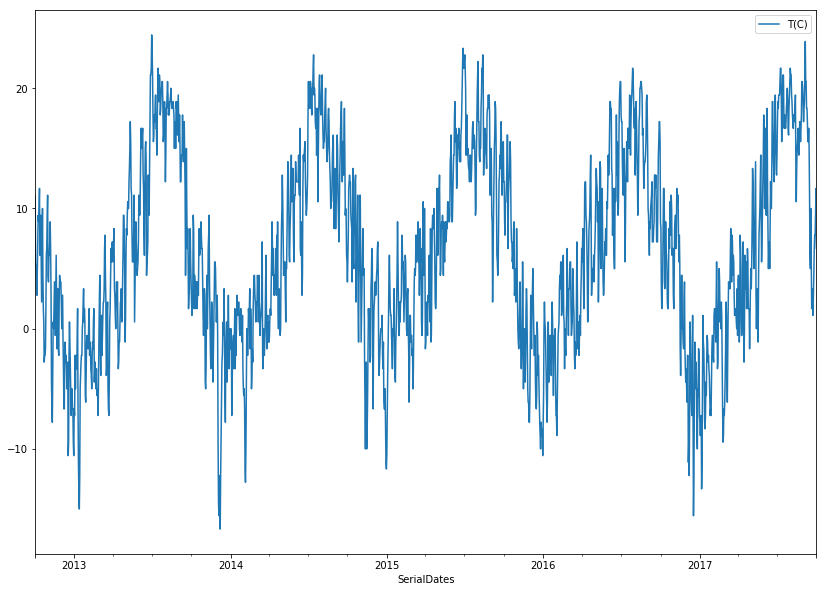

In [38]:
%matplotlib inline 
df.plot(x='SerialDates', y='T(C)',figsize=(14,10)) #plot df var. x-axis of date and y-axis temp. T(C)

mean =  6.31901369863
variance = 64.561615356


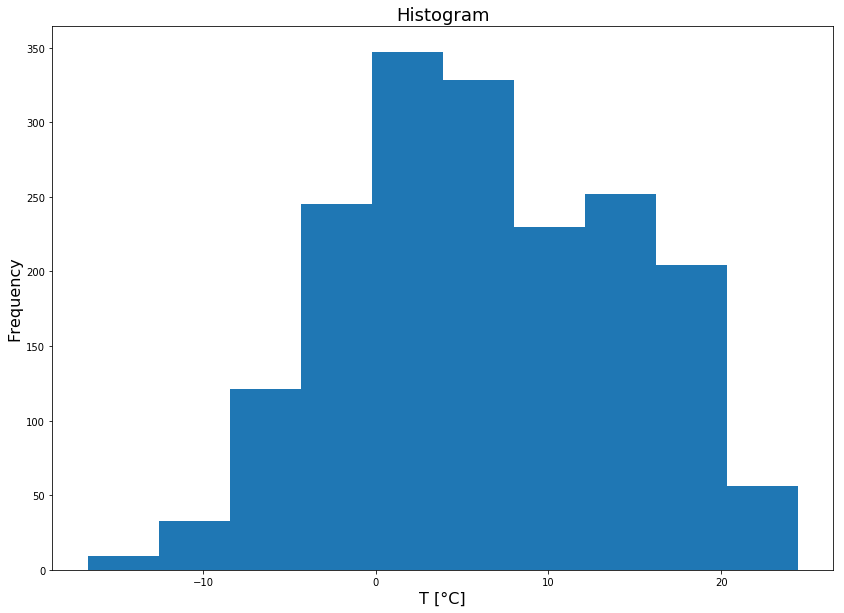

In [46]:
#Get temp from dataframe
T = df['T(C)'].values 

#Determine some basic statistics
mean = np.mean(T)
variance = np.var(T)

print('mean = ', mean)
print('variance =', variance)

plt.figure(figsize=(14,10))
plt.hist(T)
plt.title('Histogram',fontsize=18)
plt.xlabel('T [\N{DEGREE SIGN}C]',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

## 4) Get two time series that are lagged by one $\Delta t$, and plot them against each other

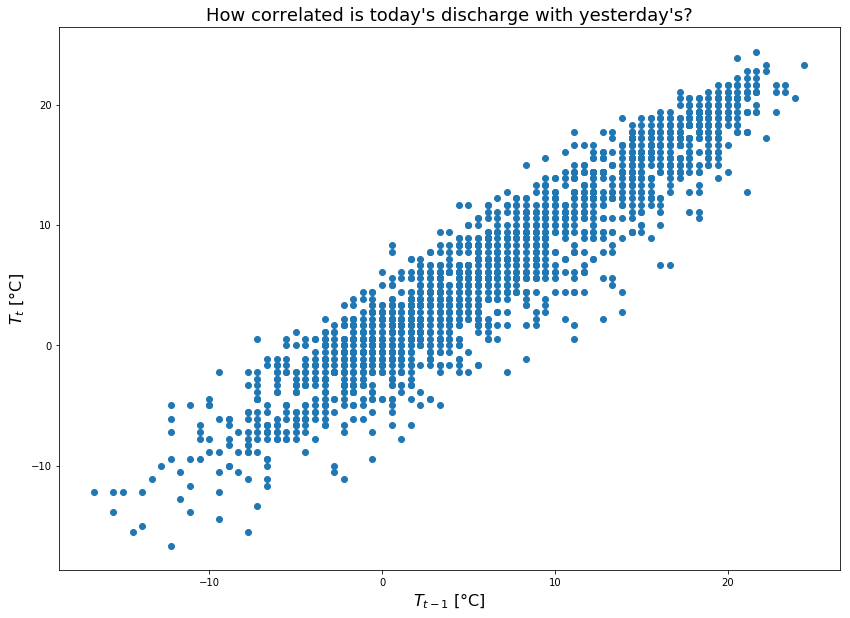

0.94002


In [55]:
# Use the pandas .values operator to load the values of temperature (the 'T(C)' column)
# from the pandas dataframe into a numpy array
T = df['T(C)'].values 

# Use numpy array indexing to get Temp. from October 2, 2012 to September 30, 2017. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
Tt   = T[1:-1] 

# Similarly get discharge from October 1, 2012 to September 29, 2017 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
Ttm1 = T[0:-2]


# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Ttm1,Tt,'o')
plt.title('How correlated is today\'s discharge with yesterday\'s?',fontsize=18)
plt.xlabel('$T_{t-1}$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.ylabel('$T_t$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.show()

#statistical measure of the correlation (R^2 value)
R2=np.corrcoef(Ttm1,Tt)
R2 = round(R2[1,0],5)
print(R2)

## 5) Save the dataframe as a pandas "pickle" file

In [29]:
df.to_pickle('BogusBasin_AirTemp_2010to2017.pkl')

## 6) How correlated is temperature today with temperature from 30 and 365 days ago?


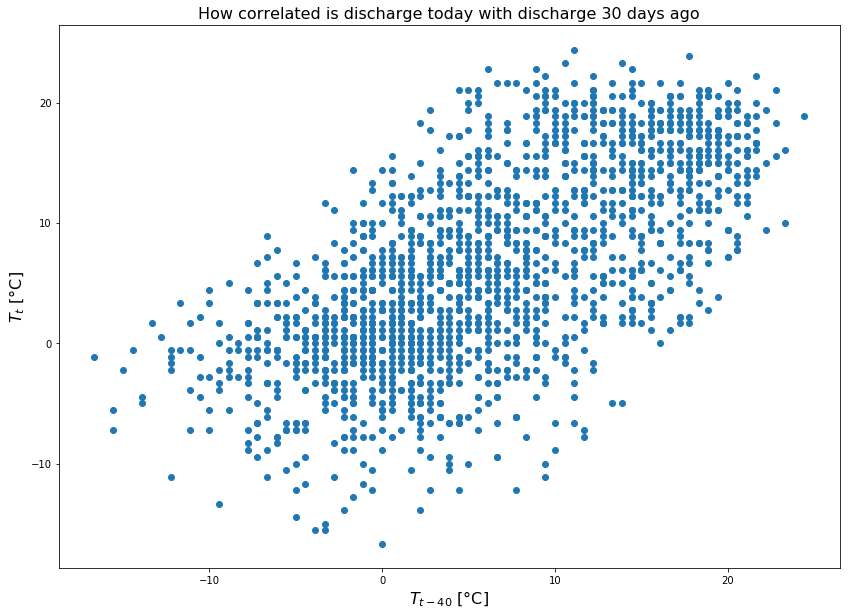

0.65997


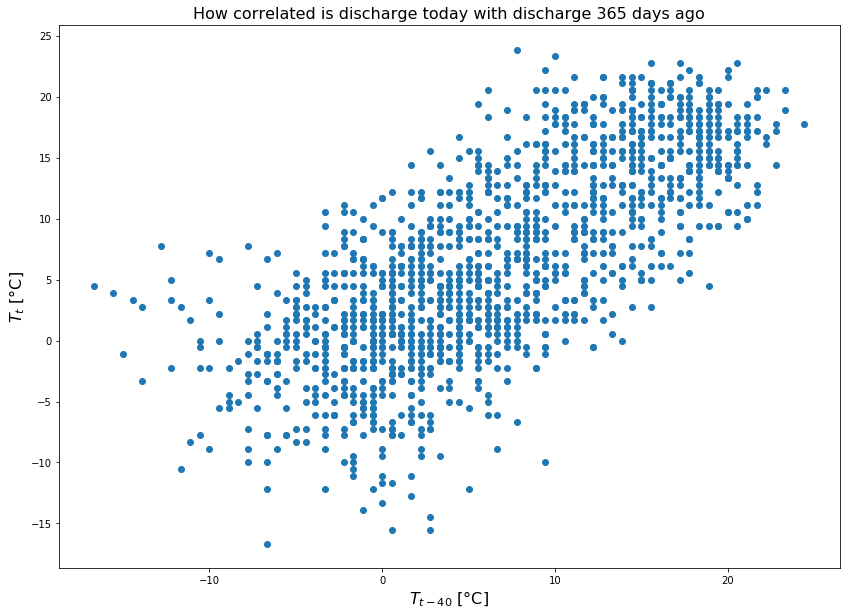

0.73022


In [32]:
###################################
##30 days
Tt   = T[30:-1] 
Ttmk = T[0:-31]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Ttmk,Tt,'o')
plt.title('How correlated is discharge today with discharge 30 days ago',fontsize=16)
plt.xlabel('$T_{t-40}$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.ylabel('$T_t$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.show()

#Correlation of new analysis 
R2=np.corrcoef(Ttmk,Tt)
R2 = round(R2[1,0],5)
print(R2)


###################################
## Out of curiosity
##365 days
Tt1   = T[365:-1] 
Ttmk1 = T[0:-366]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Ttmk1,Tt1,'o')
plt.title('How correlated is discharge today with discharge 365 days ago',fontsize=16)
plt.xlabel('$T_{t-40}$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.ylabel('$T_t$ [\N{DEGREE SIGN}C]',fontsize=16)
plt.show()

#Correlation of new analysis 
R2_1 =np.corrcoef(Ttmk1,Tt1)
R2_1 = round(R2_1[1,0],5)
print(R2_1)